In [1]:
import vitaldb
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
caseids = vitaldb.find_cases(['ECG_II'])

In [3]:
caseids

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 18

In [4]:
print(len(caseids))

6355


In [5]:
vals = vitaldb.load_case(caseids[0], ['ECG_II'], 1/100)
print(vals)

[[        nan]
 [        nan]
 [        nan]
 ...
 [ 0.148893  ]
 [-0.32508701]
 [        nan]]


In [6]:
ecg1 = vals[:, 0]
ecg2 = vitaldb.load_case(caseids[1], ['ECG_II'], 1/100)[:, 0]
ecg3 = vitaldb.load_case(caseids[2], ['ECG_II'], 1/100)[:, 0]
ecg4 = vitaldb.load_case(caseids[3], ['ECG_II'], 1/100)[:, 0]

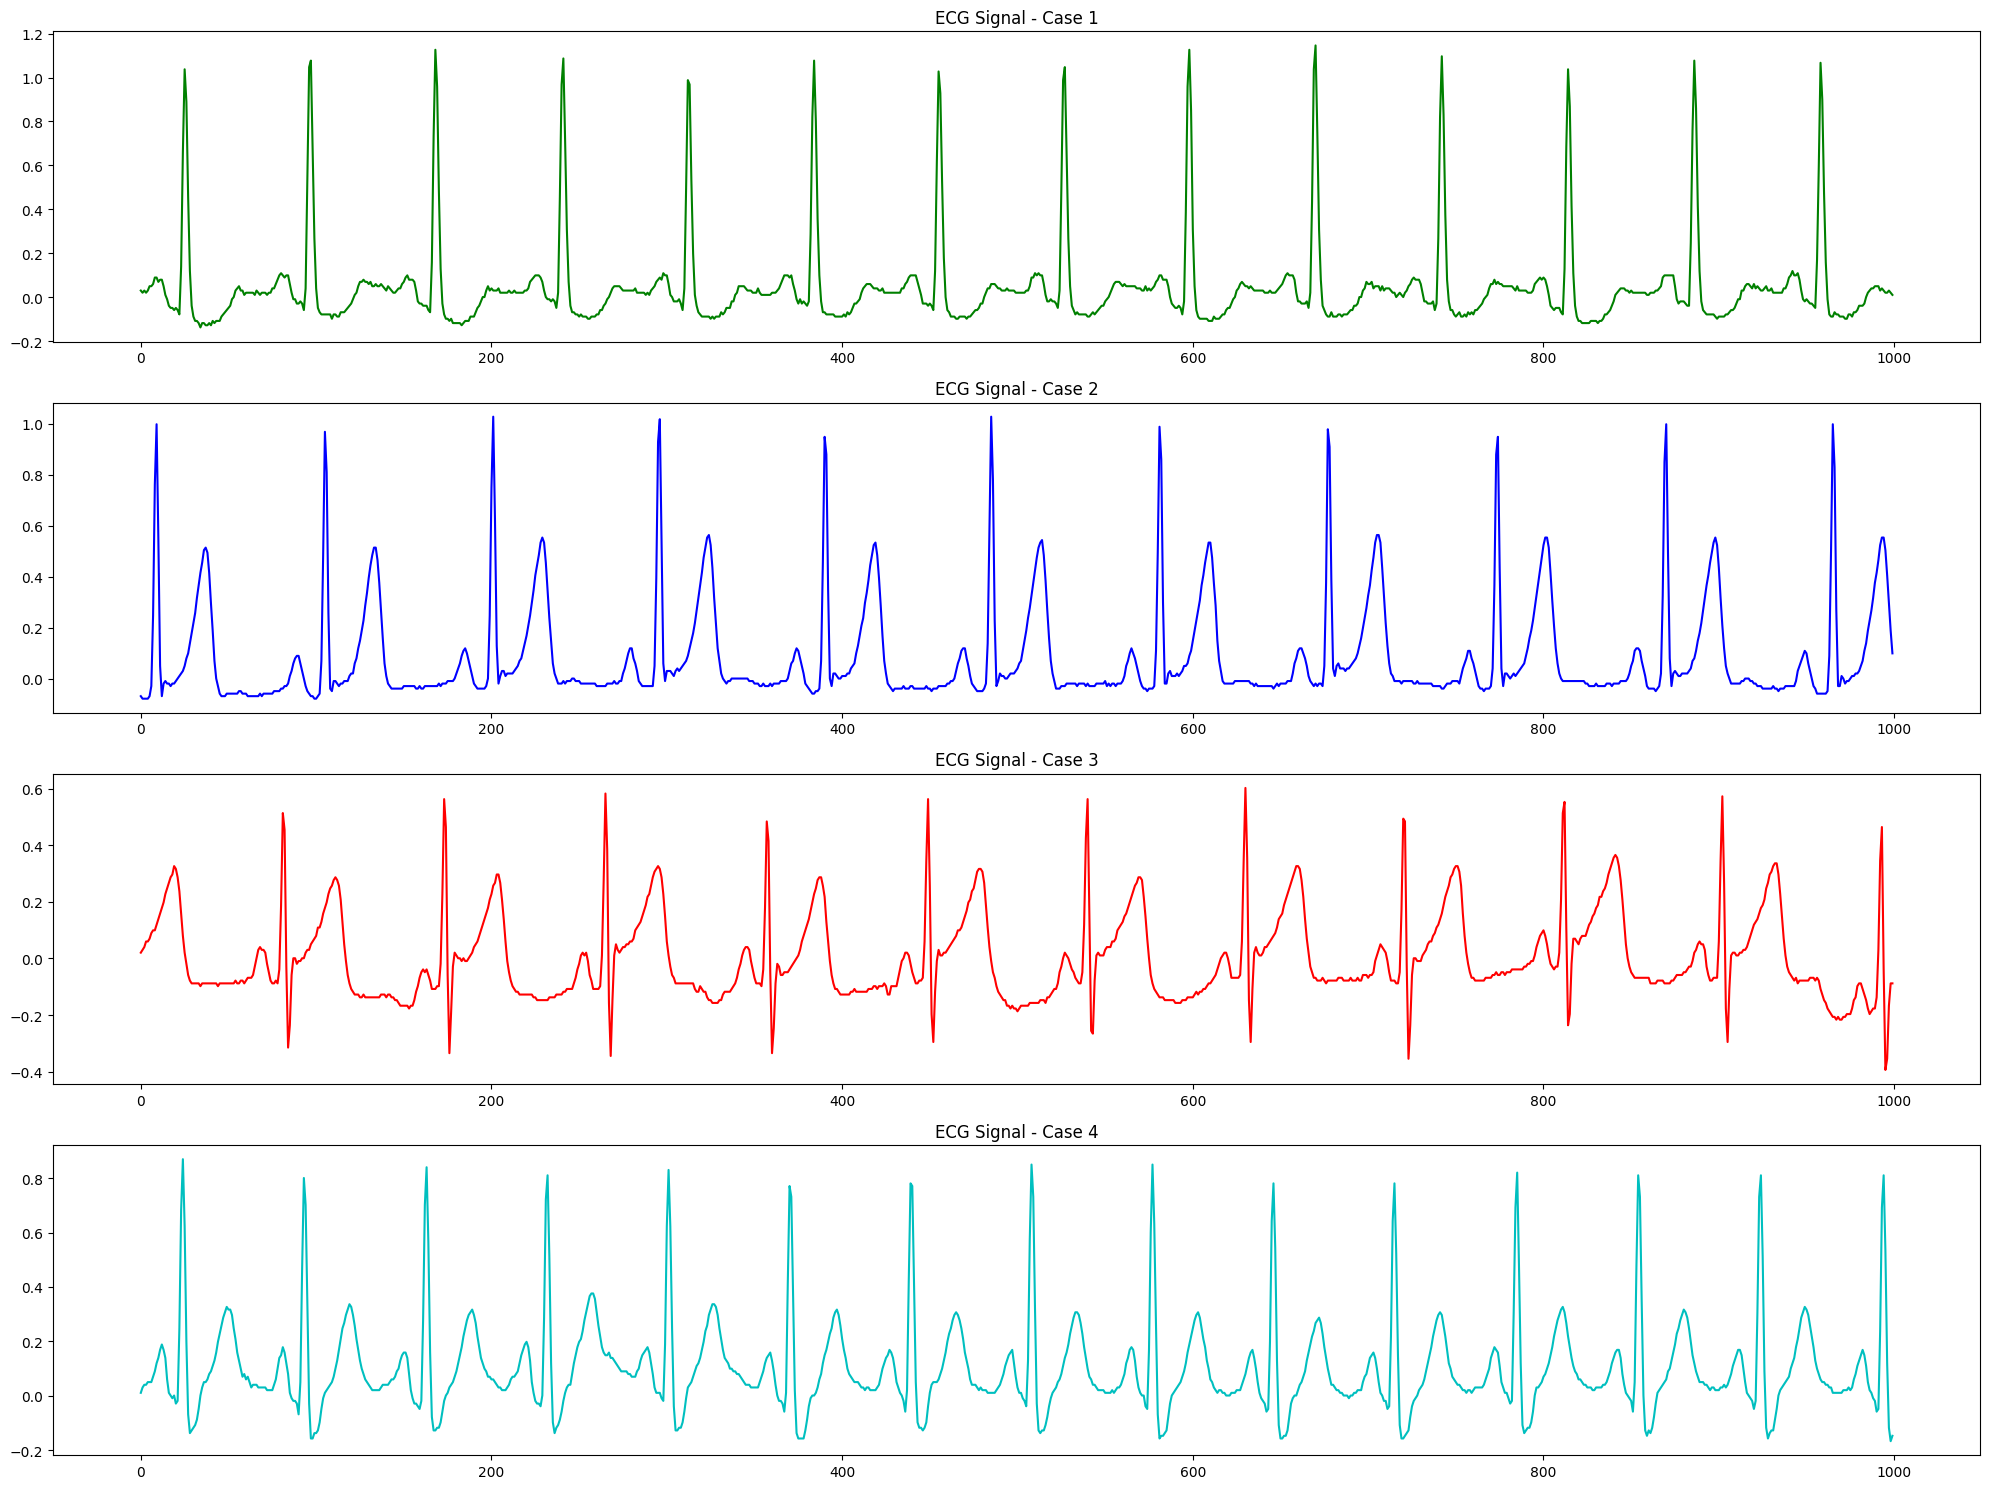

In [7]:
plt.figure(figsize=(20, 15))

plt.subplot(411)
plt.plot(ecg1[110000:111000], color='g')
plt.title('ECG Signal - Case 1')

plt.subplot(412)
plt.plot(ecg2[110000:111000], color='b')
plt.title('ECG Signal - Case 2')

plt.subplot(413)
plt.plot(ecg3[110000:111000], color='r')
plt.title('ECG Signal - Case 3')

plt.subplot(414)
plt.plot(ecg4[110000:111000], color='c')
plt.title('ECG Signal - Case 4')

plt.tight_layout()
plt.show()

6355
Valor final do vetor de tempo da série 1 em segundos: 11541.10 segundos
Valor final do vetor de tempo da série 1 em horas: 3.21 horas
Valor final do vetor de tempo da série 2 em segundos: 15740.40 segundos
Valor final do vetor de tempo da série 2 em horas: 4.37 horas
Valor final do vetor de tempo da série 3 em segundos: 4394.04 segundos
Valor final do vetor de tempo da série 3 em horas: 1.22 horas
Valor final do vetor de tempo da série 4 em segundos: 20989.40 segundos
Valor final do vetor de tempo da série 4 em horas: 5.83 horas


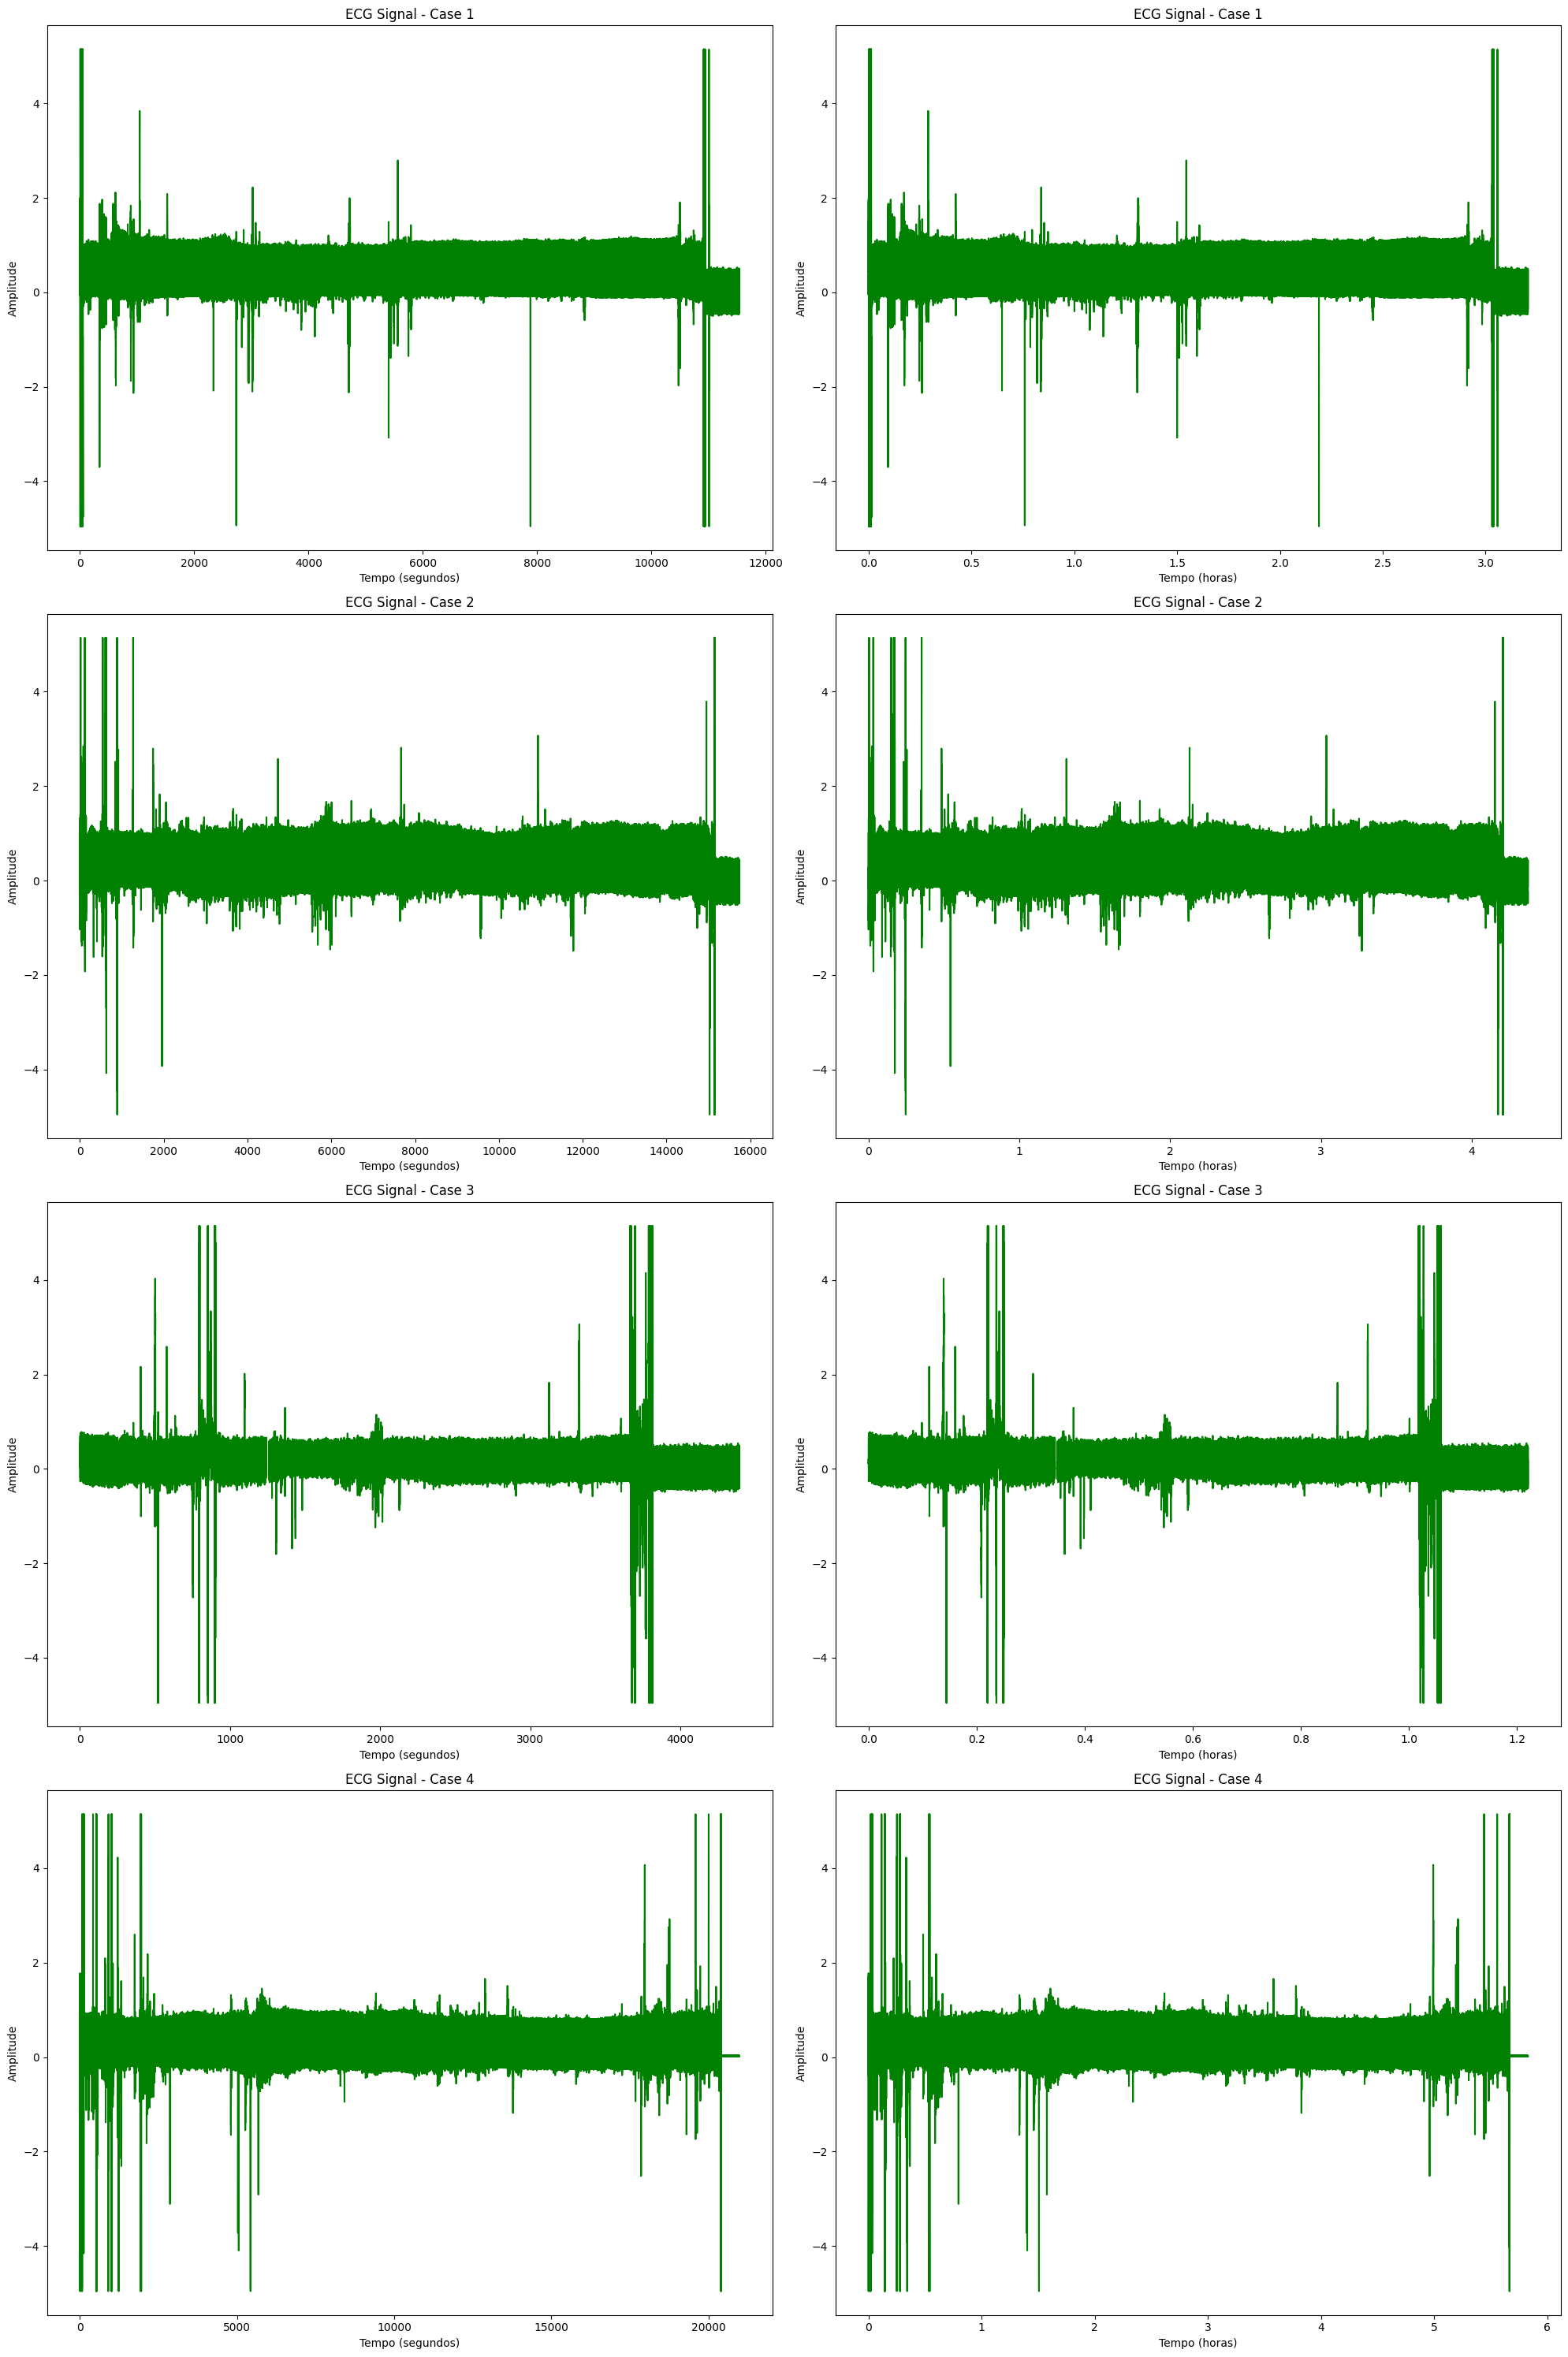

In [8]:
caseids = vitaldb.find_cases(['ECG_II'])

print(len(caseids))

plt.figure(figsize=(20, 30))

for i in range(4):
    vals = vitaldb.load_case(caseids[i], ['ECG_II'], 1/100)
    
    ecg = vals[:, 0]
    intervalo_amostragem = 1/100

    tempo = np.arange(0, len(ecg) * intervalo_amostragem, intervalo_amostragem)
    tempo_em_horas = tempo / 3600.0

    plt.subplot(4, 2, 2*i+1)
    plt.plot(tempo, ecg, color='g')
    plt.title(f'ECG Signal - Case {i+1}')
    plt.xlabel('Tempo (segundos)')
    plt.ylabel('Amplitude')

    plt.subplot(4, 2, 2*i+2)
    plt.plot(tempo_em_horas, ecg, color='g')
    plt.title(f'ECG Signal - Case {i+1}')
    plt.xlabel('Tempo (horas)')
    plt.ylabel('Amplitude')

    valor_final_tempo_segundos = tempo[-1]
    valor_final_tempo_horas = tempo_em_horas[-1]
    print(f'Valor final do vetor de tempo da série {i+1} em segundos: {valor_final_tempo_segundos:.2f} segundos')
    print(f'Valor final do vetor de tempo da série {i+1} em horas: {valor_final_tempo_horas:.2f} horas')

# Exibir a figura
plt.tight_layout()
plt.show()

In [9]:
import requests
import pandas as pd
import json
from io import StringIO

In [10]:
def get_all_case_info():
    url = "https://api.vitaldb.net/cases"
    response = requests.get(url)

    if response.status_code == 200:
        csv_text = response.text.lstrip('\ufeff')
        df_info = pd.read_csv(StringIO(csv_text))
        df_info = df_info.fillna("Valor inválido (NaN)")
        return df_info
    else:
        print(f"Erro ao obter informações de casos. Código de status: {response.status_code}")
        return None

In [11]:
all_cases_info = get_all_case_info()

In [12]:
if all_cases_info is not None:
    selected_columns = [
        'caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend', 'opstart', 'opend',
        'adm', 'dis', 'icu_days', 'death_inhosp', 'age', 'sex', 'height', 'weight', 'bmi', 'asa',
        'emop', 'department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type',
        'preop_htn', 'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt', 'preop_pt',
        'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc', 'preop_alb', 'preop_ast', 'preop_alt',
        'preop_bun', 'preop_cr', 'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
        'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize', 'iv1', 'iv2',
        'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl', 'intraop_uo', 'intraop_rbc',
        'intraop_ffp', 'intraop_crystalloid', 'intraop_colloid', 'intraop_ppf', 'intraop_mdz',
        'intraop_ftn', 'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe', 'intraop_epi',
        'intraop_ca'
    ]

    df_info_selected = all_cases_info[selected_columns]

    print(df_info_selected)

      caseid  subjectid  casestart  caseend  anestart   aneend  opstart  \
0          1       5955          0    11542      -552  10848.0     1668   
1          2       2487          0    15741     -1039  14921.0     1721   
2          3       2861          0     4394      -590   4210.0     1090   
3          4       1903          0    20990      -778  20222.0     2522   
4          5       4416          0    21531     -1009  22391.0     2591   
...      ...        ...        ...      ...       ...      ...      ...   
6383    6384       5583          0    15248      -260  15640.0     2140   
6384    6385       2278          0    20643      -544  20996.0     2396   
6385    6386       4045          0    19451      -667  19133.0     3533   
6386    6387       5230          0    12025      -550  12830.0     1730   
6387    6388       1306          0    10249       -79  10121.0     2321   

      opend     adm      dis  ...  intraop_colloid  intraop_ppf  intraop_mdz  \
0     10368 -236220

In [13]:
selected_subjectids = [1, 2, 3, 4]

In [14]:
df_info_selected_subjects = df_info_selected[df_info_selected['caseid'].isin(selected_subjectids)]

In [15]:
df_info_selected_subjects

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0


In [18]:
selected_columns = ['caseid', 'sex', 'age', 'height', 'weight', 'bmi']

In [19]:
df_info_selected_subjects_table = df_info_selected_subjects[selected_columns]

In [21]:
df_info_selected_subjects_table = df_info_selected_subjects_table.rename(columns={'caseid': 'id'})

In [22]:
df_info_selected_subjects_table

,id,sex,age,height,weight,bmi
0,1,M,77.0,160.2,67.5,26.3
1,2,M,54.0,167.3,54.8,19.6
2,3,M,62.0,169.1,69.7,24.4
3,4,M,74.0,160.6,53.0,20.5
